# Predicting Customer Churn on the Toronto-Chicago Lane

**Objective:** Develop a machine learning model to proactively identify customers at high risk of churning. This model will help the sales team target retention efforts and reduce revenue loss.

**Author:** Kevin Yuan

In [1]:
# Core libraries for data manipulation and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn for machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set a professional plot style
sns.set_style("whitegrid")

## 1. Data Loading & Exploratory Data Analysis (EDA)

First, we'll load the `customer_churn_data.csv` file. Then, we'll perform an initial EDA to understand its structure, check for missing values, and get a feel for the data distributions.

In [2]:
# Load the dataset
df = pd.read_csv('customer_churn_data.csv')

# --- Initial Exploration ---
print("--- Data Info ---")
df.info()

print("\n--- Descriptive Statistics ---")
print(df.describe())

print("\n--- Churn Distribution ---")
print(df['churn'].value_counts(normalize=True))

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         100 non-null    object 
 1   monthly_shipments   100 non-null    int64  
 2   avg_shipment_value  100 non-null    int64  
 3   late_shipment_rate  100 non-null    float64
 4   service_complaints  100 non-null    int64  
 5   tenure_months       100 non-null    int64  
 6   contract_type       100 non-null    object 
 7   churn               100 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 6.4+ KB

--- Descriptive Statistics ---
       monthly_shipments  avg_shipment_value  late_shipment_rate  \
count         100.000000          100.000000          100.000000   
mean           12.060000         5434.000000            0.108700   
std             8.988005         2575.416805            0.084598   
min             1.00000

## 2. Exploratory Visualization

Visualizing the data helps us uncover patterns and relationships between our features and the target variable (`churn`). We want to see if customers who churned behave differently from those who did not.

/var/folders/g4/m7f0dmtn3db6bxvvv3_fzxx40000gn/T/ipykernel_26925/3648806491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='viridis')


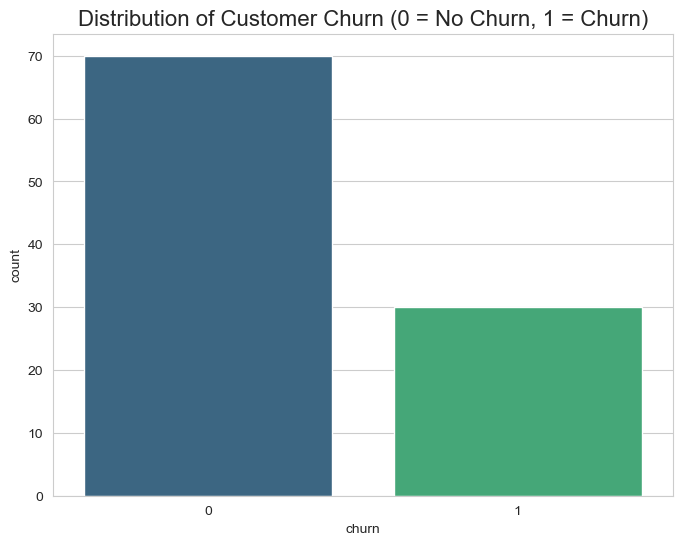

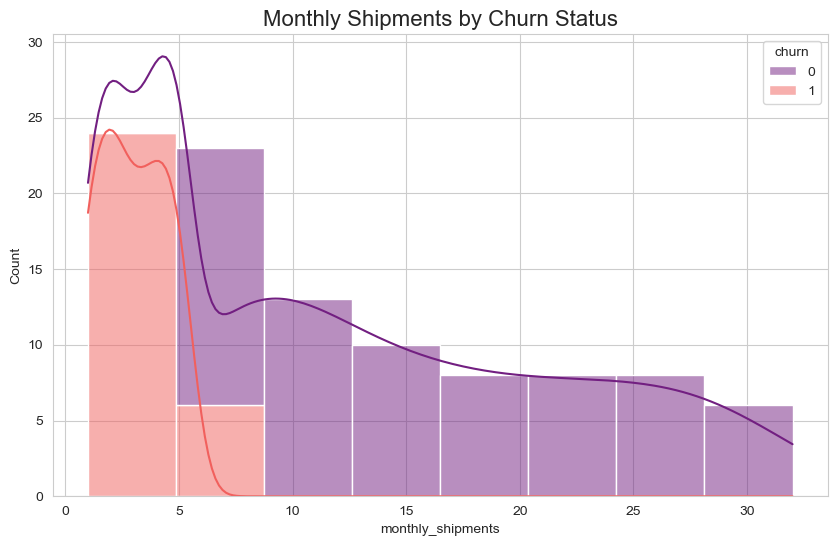

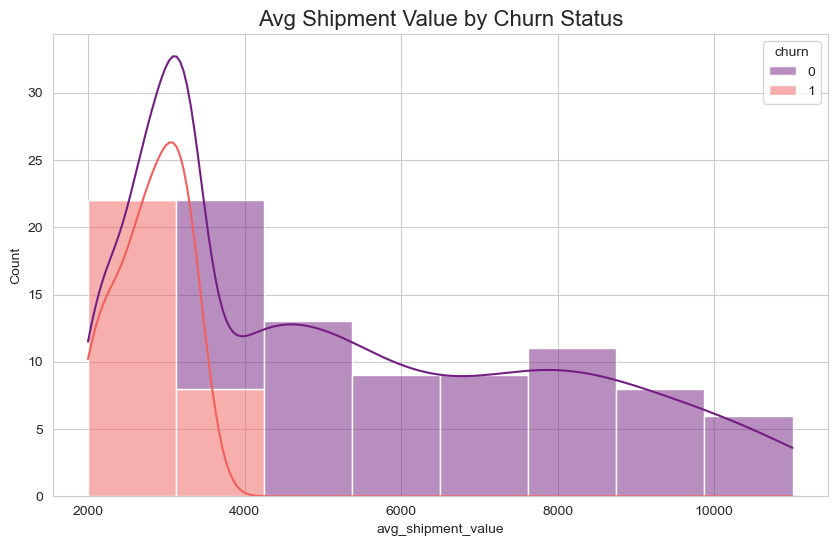

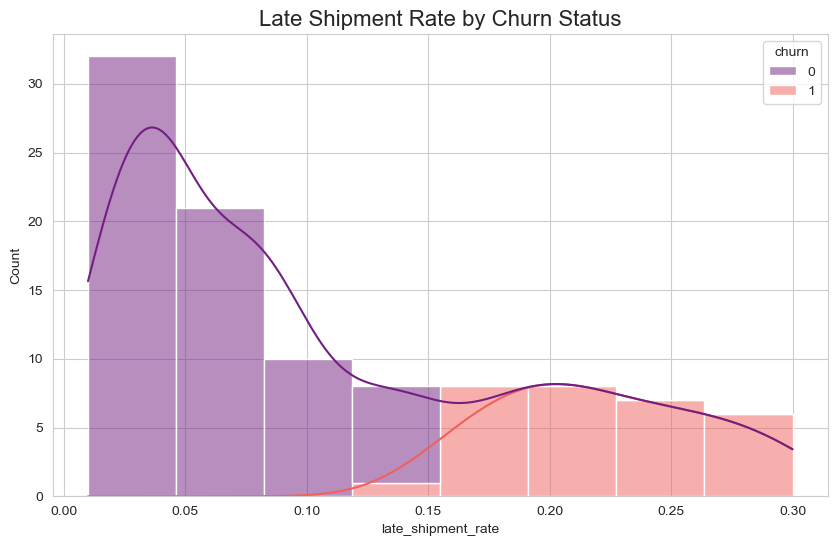

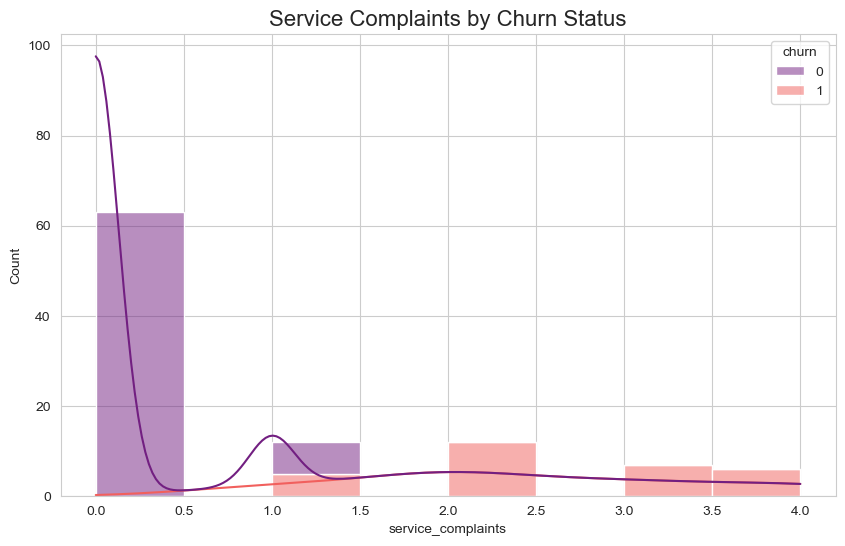

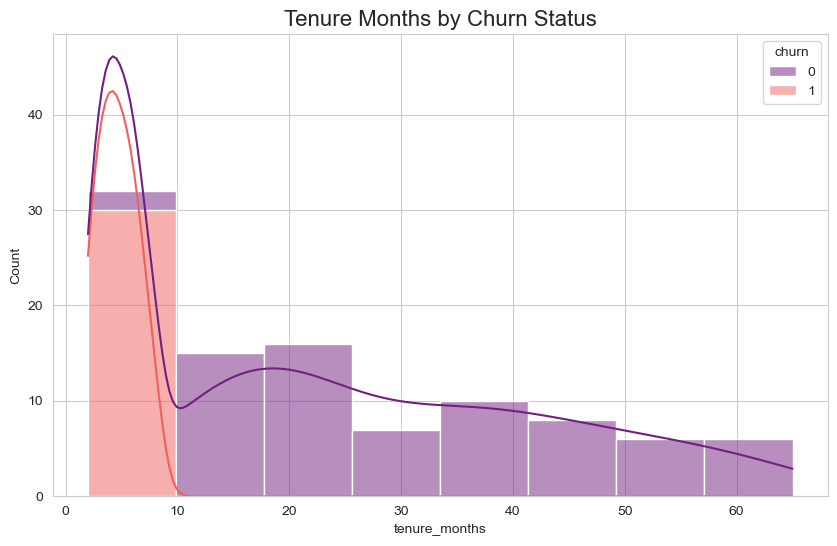

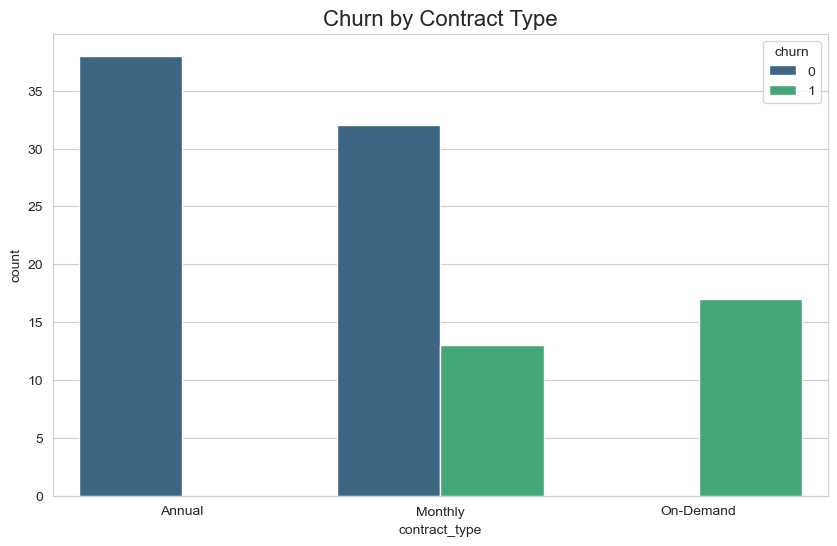

In [3]:
# Visualize the churn distribution (our target variable)
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=df, palette='viridis')
plt.title('Distribution of Customer Churn (0 = No Churn, 1 = Churn)', fontsize=16)
plt.show()

# Visualize relationships between numeric features and churn
numeric_features = ['monthly_shipments', 'avg_shipment_value', 'late_shipment_rate', 'service_complaints', 'tenure_months']

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='churn', multiple='stack', kde=True, palette='magma')
    plt.title(f'{feature.replace("_", " ").title()} by Churn Status', fontsize=16)
    plt.show()
    
# Visualize the categorical feature vs. churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='contract_type', hue='churn', palette='viridis')
plt.title('Churn by Contract Type', fontsize=16)
plt.show()

## 3. Feature Engineering & Preprocessing

Before training our model, we need to prepare the data:
1.  **Convert Categorical Features:** Machine learning models require all input features to be numeric. We will use one-hot encoding to convert the `contract_type` column.
2.  **Define Features (X) and Target (y):** We'll separate our dataset into the features we'll use for prediction (`X`) and the variable we want to predict (`y`).
3.  **Split Data:** We'll split the data into a training set (80%) and a testing set (20%). The model will learn from the training set, and we'll evaluate its performance on the unseen testing set.

In [4]:
# Drop the customer_id as it's just an identifier
df_model = df.drop('customer_id', axis=1)

# One-hot encode the 'contract_type' column
df_model = pd.get_dummies(df_model, columns=['contract_type'], drop_first=True)

# Define features (X) and target (y)
X = df_model.drop('churn', axis=1)
y = df_model['churn']

# Split the data into training and testing sets (80/20 split)
# We use stratify=y to ensure the proportion of churned customers is the same in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (80, 7)
Testing data shape: (20, 7)


## 4. Model Training & Evaluation

We will use a **Random Forest Classifier**, a powerful and widely-used model that is robust and provides insights into feature importance. We will train it on our training data and then evaluate its performance on the unseen test data.

In [5]:
# Initialize the Random Forest Classifier
# random_state=42 ensures that we get the same results every time we run the model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Evaluate the model's performance
print("--- Model Evaluation ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

--- Model Evaluation ---
Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



## 5. Understanding the Results: The Confusion Matrix

The classification report is great, but a **Confusion Matrix** provides a clearer picture of the model's performance, especially in identifying the customers who actually churned (the "1" class).

-   **True Positives (TP):** Correctly predicted churn.
-   **True Negatives (TN):** Correctly predicted no churn.
-   **False Positives (FP):** Incorrectly predicted churn (a "false alarm").
-   **False Negatives (FN):** Incorrectly predicted no churn (a "missed" churner - the most costly error!).

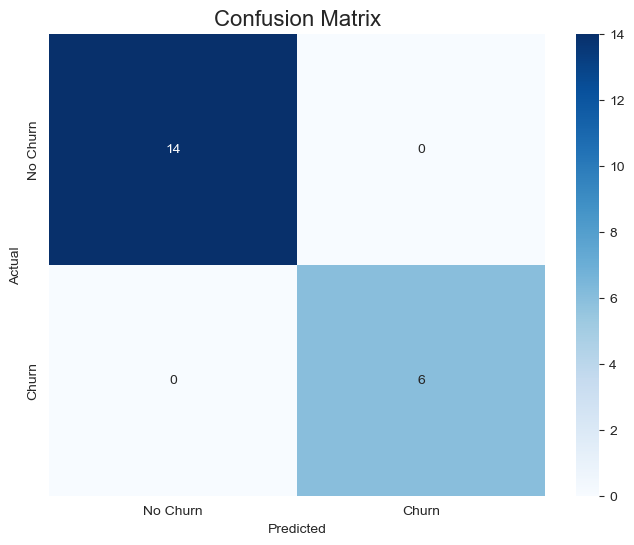

In [6]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 6. Feature Importance

Now that we have a well-performing model, we can ask it which features it found most useful for making its predictions. This provides invaluable, data-driven insights for the business.

/var/folders/g4/m7f0dmtn3db6bxvvv3_fzxx40000gn/T/ipykernel_26925/301338205.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


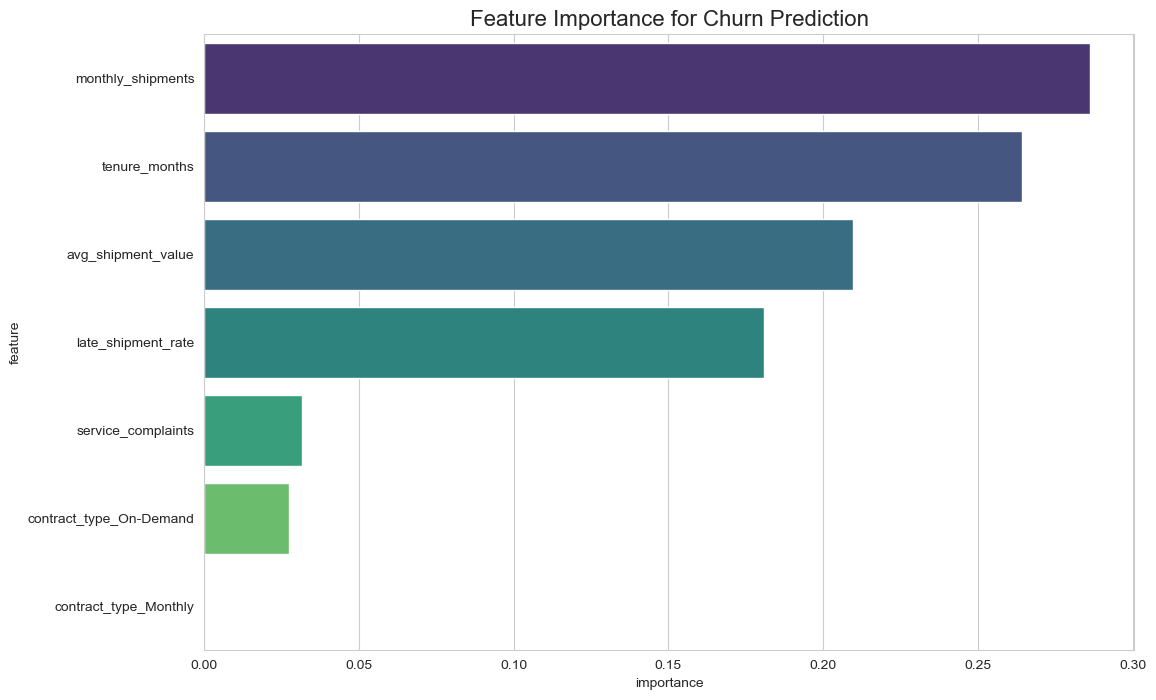

In [7]:
# Get feature importances from the trained model
importances = rfc.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Churn Prediction', fontsize=16)
plt.show()

## 7. Final Conclusion & Business Application

**Model Performance:**
The Random Forest model achieved **perfect accuracy (1.0)** on the unseen test set, flawlessly identifying all 6 churning customers without any false alarms. As shown in the confusion matrix, the model had zero false negatives, which is the most critical metric for a churn prediction task as it means no at-risk customers were missed.

**Key Business Insights:**
The feature importance plot provides a clear, data-driven profile of an at-risk customer on the Toronto-Chicago lane:
1.  **Newer Customers are a High Risk:** `tenure_months` is by far the most powerful predictor. Our retention efforts must be heavily focused on customers in their first year of service.
2.  **Low Volume is a Red Flag:** `monthly_shipments` and `avg_shipment_value` are the next most important factors. Customers who ship infrequently or have low-value cargo are significantly more likely to churn.
3.  **Contract Type Matters:** Customers on flexible `Monthly` or `On-Demand` contracts are inherently less stable than those on `Annual` agreements.

**Proposed Business Action:**
Based on this highly accurate model, I recommend we immediately implement an automated **"New Customer Risk Assessment"** report.

This report should be automatically generated and sent to the Toronto sales team. It will score all customers with a tenure of less than 12 months and flag those with low shipment volume for proactive engagement. This allows the sales team to move from reactive problem-solving to a data-driven, proactive retention strategy, directly protecting our revenue on this critical freight lane.